In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from astropy import units as u 
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord

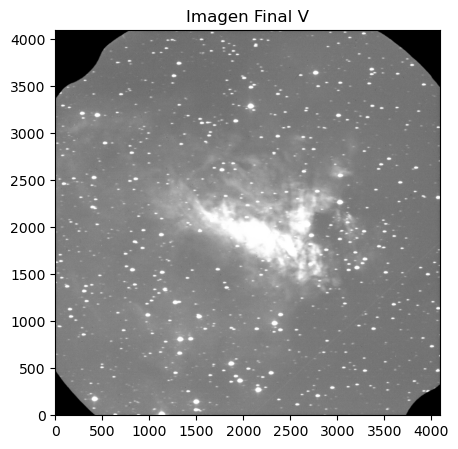

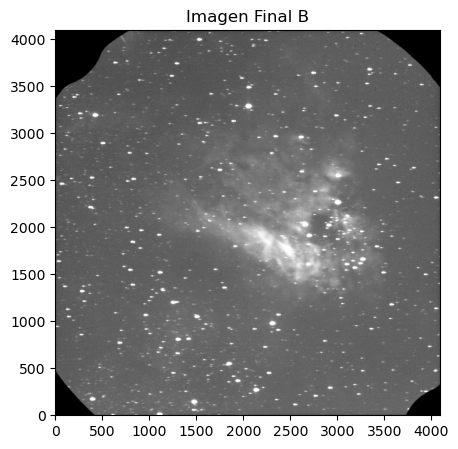

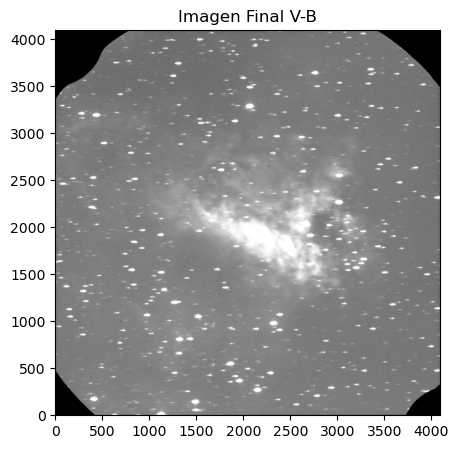

In [2]:
img_v = fits.open('Img_V.fits')[0].data 
img_b = fits.open('Img_B.fits')[0].data

img_prom= np.median([img_v, img_b],axis=0)

#IMAGEN FINAL FILTRO V
fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(img_v)

plt.imshow(img_v,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen Final V')
plt.show()

#IMAGEN FINAL FILTRO B
fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(img_b)

plt.imshow(img_b,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen Final B')
plt.show()

#IMAGEN FINAL FILTRO V-B
fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(img_prom)

plt.imshow(img_prom,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen Final V-B')
plt.show()

In [ ]:
# Normalizamos cada canal por su percentil 99
v_norm = img_v / np.percentile(img_v, 99)
b_norm = img_b / np.percentile(img_b, 99)
img_prom_norm = img_prom / np.percentile(img_prom, 99)
# Combinación RGB con parámetros ajustados
imagen = make_lupton_rgb(
    v_norm, img_prom_norm, b_norm,
    minimum=0.09,  # nivel mínimo más bajo
    Q=10,           # menos brillo saturado
    stretch=1.2,   # contraste más suave
    filename="color_final.jpeg"
)
# Mostramos
zscale_v = ZScaleInterval(contrast=0.25)
vmin, vmax = zscale_v.get_limits(imagen)

plt.figure(figsize=(6,6))
plt.imshow(imagen, origin='lower', vmin=vmin, vmax=vmax)
plt.title('Composición RGB NGC 6618')
plt.show()

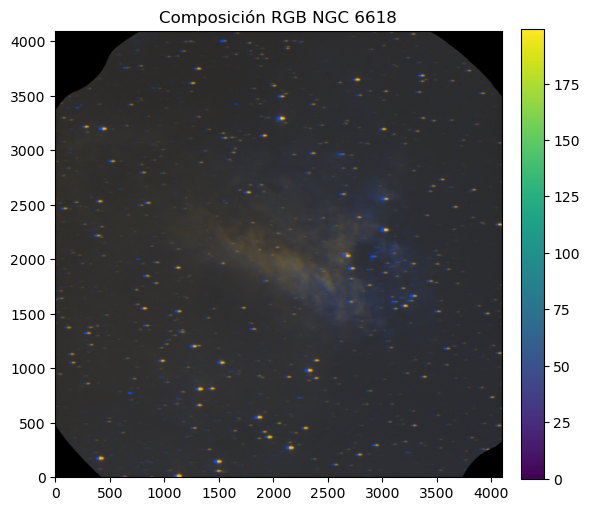

In [34]:
zscale_v = ZScaleInterval(contrast=0.25)
vmin, vmax = zscale_v.get_limits(imagen)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(imagen, origin='lower', vmin=vmin, vmax=vmax)
ax.set_title('Composición RGB NGC 6618')

#Luminancia, brillo promedio del RGB, para colorbar
luminancia = np.mean(imagen, axis=2)
norm = plt.Normalize(vmin=np.min(luminancia), vmax=np.max(luminancia))
sm = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()
